#                               House Prices Analysis in Canada in 2021
                                   

## 1)Data Cleaning

In [1]:
#Import libraries for data cleaning and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\syuan\Downloads\HouseListings-dropduplicatesandzerobath.csv")

In [3]:
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitutde,Median_Family_Income,Unnamed: 10
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0,NaN
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0,NaN
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0,NaN
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0,NaN
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0,NaN


In [4]:
#Drop the unknown column
df=df.drop(df.columns[10],axis=1)

In [5]:
#Correct a typo in the column name
df=df.rename(columns={'Longitutde':'Longitude'})

In [6]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
#Unify datatypes
df['Number_Beds']=pd.to_numeric(df['Number_Beds'],errors='coerce')
df['Number_Baths']=pd.to_numeric(df['Number_Baths'],errors='coerce')
df['Population']=pd.to_numeric(df['Population'],errors='coerce')

In [8]:
df=df.dropna(subset=['Number_Beds','Number_Baths','Population'])

In [9]:
#Drop rows with 'Latitude' and 'Longitude' data that indicates cities outside Canada 
df=df[(df['Latitude']>=42)& (df['Latitude'] <=83)]
df=df[(df['Longitude']>=-141)& (df['Longitude'] <=-53)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31978 entries, 0 to 32635
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  31978 non-null  object 
 1   Price                 31978 non-null  float64
 2   Address               31978 non-null  object 
 3   Number_Beds           31978 non-null  float64
 4   Number_Baths          31978 non-null  float64
 5   Province              31978 non-null  object 
 6   Population            31978 non-null  float64
 7   Latitude              31978 non-null  float64
 8   Longitude             31978 non-null  float64
 9   Median_Family_Income  31978 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [11]:
df.nunique()

City                       43
Price                    4293
Address                 30154
Number_Beds                31
Number_Baths               21
Province                    7
Population                 43
Latitude                   43
Longitude                  42
Median_Family_Income       31
dtype: int64

In [12]:
df['City'].unique()

array(['Toronto', 'Vancouver', 'Calgary', 'Edmonton', 'Ottawa',
       'Winnipeg', 'Hamilton', 'Kitchener', 'London', 'St. Catharines',
       'Oshawa', 'Victoria', 'Windsor', 'Saskatoon', 'Regina', 'Barrie',
       'Kelowna', 'Abbotsford', 'Sudbury', 'Kingston', 'Guelph',
       'Moncton', 'Brantford', 'Thunder Bay', 'Saint John',
       'Peterborough', 'Red Deer', 'Kamloops', 'Nanaimo', 'Lethbridge',
       'White Rock', 'Maple Ridge', 'Prince George', 'Sault Ste. Marie',
       'Medicine Hat', 'New Westminster', 'Caledon', 'Burnaby', 'Airdrie',
       'Montreal', 'Sherbrooke', 'Quebec', 'Trois-Rivieres'], dtype=object)

In [13]:
grouped_cities=df.groupby('Province')['City'].unique()
grouped_cities

Province
Alberta             [Calgary, Edmonton, Red Deer, Lethbridge, Medi...
British Columbia    [Vancouver, Victoria, Kelowna, Abbotsford, Kam...
Manitoba                                                   [Winnipeg]
New Brunswick                                   [Moncton, Saint John]
Ontario             [Toronto, Ottawa, Winnipeg, Hamilton, Kitchene...
Quebec                 [Montreal, Sherbrooke, Quebec, Trois-Rivieres]
Saskatchewan                                      [Saskatoon, Regina]
Name: City, dtype: object

In [14]:
grouped_cities['Alberta']

array(['Calgary', 'Edmonton', 'Red Deer', 'Lethbridge', 'Medicine Hat',
       'Airdrie'], dtype=object)

In [15]:
grouped_cities['British Columbia']

array(['Vancouver', 'Victoria', 'Kelowna', 'Abbotsford', 'Kamloops',
       'Nanaimo', 'White Rock', 'Maple Ridge', 'Prince George',
       'New Westminster', 'Burnaby'], dtype=object)

In [16]:
grouped_cities['Ontario']

array(['Toronto', 'Ottawa', 'Winnipeg', 'Hamilton', 'Kitchener', 'London',
       'St. Catharines', 'Oshawa', 'Windsor', 'Saskatoon', 'Regina',
       'Barrie', 'Sudbury', 'Kingston', 'Guelph', 'Brantford',
       'Thunder Bay', 'Peterborough', 'Sault Ste. Marie', 'Caledon'],
      dtype=object)

In [17]:
#Correct data entry mistakes
df.loc[df['City']=='Winnipeg','Province']='Manitoba'
df.loc[df['City']=='Saskatoon','Province']='Saskatchewan'
df.loc[df['City']=='Regina','Province']='Saskatchewan'

## 2)Exploratory Data Analysis


### Question 1---Houses in which province are the most expensive? 

In [18]:
df.groupby('Province')['Price'].mean()

Province
Alberta             5.329808e+05
British Columbia    1.369638e+06
Manitoba            4.821402e+05
New Brunswick       4.266086e+05
Ontario             9.569191e+05
Quebec              6.022337e+05
Saskatchewan        4.041216e+05
Name: Price, dtype: float64

According to the average prices of each province,houeses in British Columbia (BC) are the most expensive.

### Question 2---Houses in which city are the most expensive?

In [19]:
province_city_count = df.groupby('Province')['City'].count()
province_city_count

Province
Alberta              3819
British Columbia    10964
Manitoba              476
New Brunswick         510
Ontario             13750
Quebec                569
Saskatchewan         1890
Name: City, dtype: int64

In [20]:
df.groupby('City')['Price'].mean().nlargest(1)

City
White Rock    2.221587e+06
Name: Price, dtype: float64

According to the average prices of each city,houeses in White Rock (BC) are the most expensive. 

### Question 3---What is the average house price a family with each median income bracket of 10000 possesses ? 

In [21]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.197800e+04,31978.000000,31978.000000,3.197800e+04,31978.000000,31978.000000,31978.000000
mean,9.932872e+05,3.339296,2.597129,6.734952e+05,47.269418,-99.835620,90141.672400
std,1.047240e+06,1.726713,1.364135,1.165726e+06,3.350853,20.210799,12475.176374
min,2.150000e+04,0.000000,1.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.999000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.600000,82000.000000
50%,7.389500e+05,3.000000,2.000000,2.491250e+05,48.428300,-104.606700,89000.000000
75%,1.149000e+06,4.000000,3.000000,7.295600e+05,49.694200,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,-64.771400,133000.000000


In [22]:
#Categorize Median_Family_Income

income_ranges=[(60000,70000),(70000,80000),(80000,90000),(90000,100000),(100000,110000),(110000,120000),(120000,130000),(130000,140000)]
bins= [low - 1 for (low, high) in income_ranges] + [income_ranges[-1][1]]
income_labels = [f'{low + 1}-{high}' for (low, high) in income_ranges]
df['IncomeCategory'] = pd.cut(df['Median_Family_Income'], bins=bins, labels=income_labels)
print(df[['Median_Family_Income', 'IncomeCategory']])


       Median_Family_Income IncomeCategory
0                   97000.0   90001-100000
1                   97000.0   90001-100000
2                   97000.0   90001-100000
3                   97000.0   90001-100000
4                   97000.0   90001-100000
...                     ...            ...
32631               62400.0    60001-70000
32632               62400.0    60001-70000
32633               62400.0    60001-70000
32634               62400.0    60001-70000
32635               62400.0    60001-70000

[31978 rows x 2 columns]


In [23]:
#Calculate the average price of house possessed by families in each income bracket
df['avg_price_incomecategory']=df.groupby('IncomeCategory')['Price'].transform('mean')

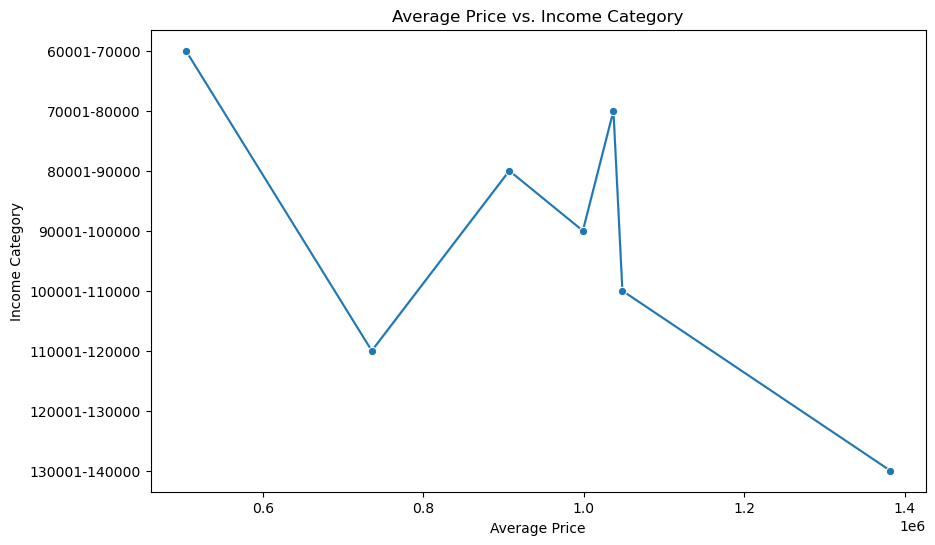

In [24]:
#Visiualize the relationship between median income and house price
plt.figure(figsize=(10, 6))
income_order = df['IncomeCategory'].unique()
df['IncomeCategory'] = pd.Categorical(df['IncomeCategory'], categories=income_order[::-1], ordered=True)
sns.lineplot(x='avg_price_incomecategory', y='IncomeCategory', data=df, marker='o')
plt.xlabel('Average Price')
plt.ylabel('Income Category')
plt.title('Average Price vs. Income Category')
plt.show()

Families with income between 70k-80k seem to hold relatively expensive houses while those with income between 110k-120k seem to hold relatively low-priced houses.The reason is worth exploring further.

### Question 4---Average House-price-to-Income ratio for families in different cities? Houses in which city is the most and least affordable respectively?

In [25]:
df['HousepricetoIncome']=df['Price']/df['Median_Family_Income']
avg=df.groupby('City')['HousepricetoIncome'].mean()
most_affordable=df.groupby('City')['HousepricetoIncome'].mean().nsmallest(1)
least_affordable=df.groupby('City')['HousepricetoIncome'].mean().nlargest(1)

In [26]:
print('Most affordable ',most_affordable)

Most affordable  City
Regina    3.753198
Name: HousepricetoIncome, dtype: float64


In [27]:
print('Least affordable',least_affordable)

Least affordable City
White Rock    30.432704
Name: HousepricetoIncome, dtype: float64


### Question 5---What are the average prices for a 3-bedroom & 3-bath house among different province? 

In [28]:
df[(df['Number_Beds']==3) &(df['Number_Baths']==3)].groupby('Province')['Price'].mean()

Province
Alberta             5.837250e+05
British Columbia    1.331687e+06
Manitoba            5.179460e+05
New Brunswick       4.758615e+05
Ontario             9.077782e+05
Quebec              6.976667e+05
Saskatchewan        4.898683e+05
Name: Price, dtype: float64

### Question 6--What is the average number of rooms most houses have in different city and province? 

In [29]:
df.groupby(['City','Province'])['Number_Beds'].mean()

City              Province        
Abbotsford        British Columbia    3.842457
Airdrie           Alberta             3.635556
Barrie            Ontario             3.553661
Brantford         Ontario             3.721044
Burnaby           British Columbia    2.531801
Caledon           Ontario             4.012048
Calgary           Alberta             3.188795
Edmonton          Alberta             3.122044
Guelph            Ontario             3.312500
Hamilton          Ontario             3.473851
Kamloops          British Columbia    3.426304
Kelowna           British Columbia    3.234326
Kingston          Ontario             3.505353
Kitchener         Ontario             3.424111
Lethbridge        Alberta             3.465608
London            Ontario             3.608596
Maple Ridge       British Columbia    3.553292
Medicine Hat      Alberta             3.516245
Moncton           New Brunswick       3.531863
Montreal          Quebec              3.625000
Nanaimo           British

### Question 7---Relationships between prices and number of beds/baths and income

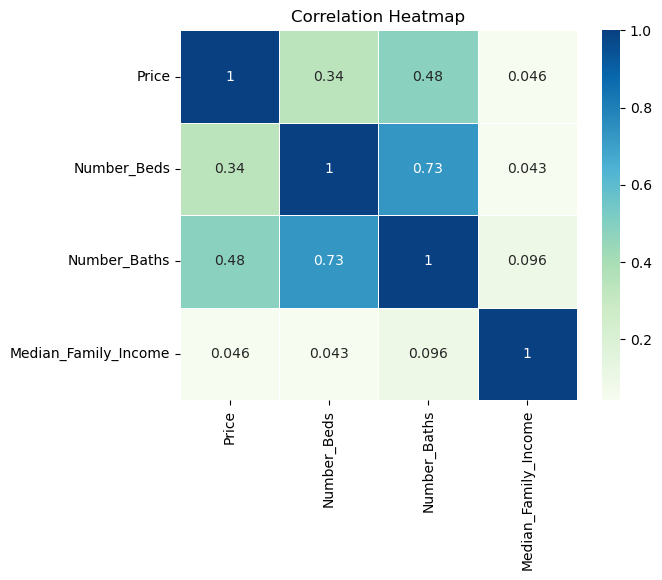

In [30]:
correlation_matrix = df[['Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

According to this dataset,house price has relatively high correlation with number of baths among number of beds,baths and income.

In [31]:
df.to_csv('houseca_file.csv', index=False)